<a href="https://colab.research.google.com/github/ianxdxd/MiamiHousing/blob/main/MiamiHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales Price Prediction

In [ ]:
# Installing required modules
!pip install scikit-learn
import sys
import pandas as pd
import math
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib_inline
import os
import tarfile
import urllib

1. PARCELNO: unique identifier for each property. About 1% appear multiple times.
2. SALE_PRC: sale price (DOLLARS)
3. LND_SQFOOT: land area (square feet)
4. TOT_LVG_AREA: floor area (square feet)
5. SPEC_FEAT_VAL: value of special features (e.g., swimming pools) (DOLLARS)
6. RAIL_DIST: distance to the nearest rail line (an indicator of noise) (feet)
7. OCEAN_DIST: distance to the ocean (feet)
8. WATER_DIST: distance to the nearest body of water (feet)
9. CNTR_DIST: distance to the Miami central business district (feet)
10. SUBCNTR_DI: distance to the nearest subcenter (feet)
11. HWY_DIST: distance to the nearest highway (an indicator of noise) (feet)
12. age: age of the structure
13. avno60plus: dummy variable for airplane noise exceeding an acceptable level
14. structure_quality: quality of the structure
15. month_sold: sale month in 2016 (1 = jan)
16. LATITUDE
17. LONGITUDE

### 1. Take a look at the data

In [ ]:
housing = pd.read_csv('miami-housing.csv')
print(housing)

        LATITUDE  LONGITUDE      PARCELNO  SALE_PRC  LND_SQFOOT  TOT_LVG_AREA  \
0      25.891031 -80.160561  622280070620  440000.0        9375          1753   
1      25.891324 -80.153968  622280100460  349000.0        9375          1715   
2      25.891334 -80.153740  622280100470  800000.0        9375          2276   
3      25.891765 -80.152657  622280100530  988000.0       12450          2058   
4      25.891825 -80.154639  622280100200  755000.0       12800          1684   
...          ...        ...           ...       ...         ...           ...   
13927  25.783130 -80.259795  131320040990  275000.0        6780           967   
13928  25.783585 -80.260354  131320040910  340000.0        7500          1854   
13929  25.783793 -80.256126  131320040420  287500.0        8460          1271   
13930  25.784007 -80.257542  131320040330  315000.0        7500          1613   
13931  25.784387 -80.258901  131320040700  250000.0        8833          1867   

       SPEC_FEAT_VAL  RAIL_

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LATITUDE           13932 non-null  float64
 1   LONGITUDE          13932 non-null  float64
 2   PARCELNO           13932 non-null  int64  
 3   SALE_PRC           13932 non-null  float64
 4   LND_SQFOOT         13932 non-null  int64  
 5   TOT_LVG_AREA       13932 non-null  int64  
 6   SPEC_FEAT_VAL      13932 non-null  int64  
 7   RAIL_DIST          13932 non-null  float64
 8   OCEAN_DIST         13932 non-null  float64
 9   WATER_DIST         13932 non-null  float64
 10  CNTR_DIST          13932 non-null  float64
 11  SUBCNTR_DI         13932 non-null  float64
 12  HWY_DIST           13932 non-null  float64
 13  age                13932 non-null  int64  
 14  avno60plus         13932 non-null  int64  
 15  month_sold         13932 non-null  int64  
 16  structure_quality  139

In [ ]:
housing.describe()
# This shows a summary of the numerical attributes
# the percentile rows (25%, 50%, 75%) indicates the value below which a given
# percentage of observations in a group of observations fall
# E.g. --> 25% of the miami neighborhoods have a land sqr foot lower than 5400feet

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
count,13932.000000,13932.000000,1.393200e+04,1.393200e+04,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000
mean,25.728811,-80.327475,2.356496e+12,3.999419e+05,8620.879917,2058.044574,9562.493468,8348.548715,31690.993798,11960.285235,68490.327132,41115.047265,7723.770693,30.669251,0.014930,6.655828,3.513997
std,0.140633,0.089199,1.199290e+12,3.172147e+05,6070.088742,813.538535,13890.967782,6178.027333,17595.079468,11932.992369,32008.474808,22161.825935,6068.936108,21.153068,0.121276,3.301523,1.097444
min,25.434333,-80.542172,1.020008e+11,7.200000e+04,1248.000000,854.000000,0.000000,10.500000,236.100000,0.000000,3825.600000,1462.800000,90.200000,0.000000,0.000000,1.000000,1.000000
25%,25.620056,-80.403278,1.079160e+12,2.350000e+05,5400.000000,1470.000000,810.000000,3299.450000,18079.350000,2675.850000,42823.100000,23996.250000,2998.125000,14.000000,0.000000,4.000000,2.000000
50%,25.731810,-80.338911,3.040300e+12,3.100000e+05,7500.000000,1877.500000,2765.500000,7106.300000,28541.750000,6922.600000,65852.400000,41109.900000,6159.750000,26.000000,0.000000,7.000000,4.000000
75%,25.852269,-80.258019,3.060170e+12,4.280000e+05,9126.250000,2471.000000,12352.250000,12102.600000,44310.650000,19200.000000,89358.325000,53949.375000,10854.200000,46.000000,0.000000,9.000000,4.000000
max,25.974382,-80.119746,3.660170e+12,2.650000e+06,57064.000000,6287.000000,175020.000000,29621.500000,75744.900000,50399.800000,159976.500000,110553.800000,48167.300000,96.000000,1.000000,12.000000,5.000000


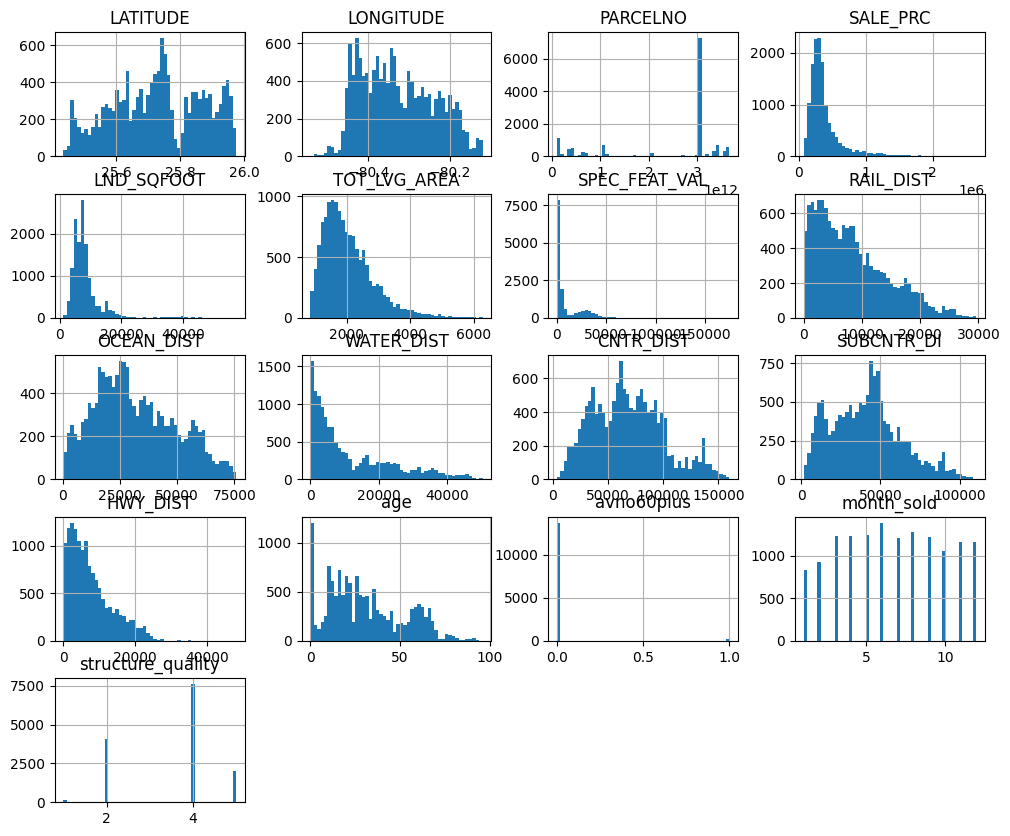

In [ ]:
%matplotlib inline
housing.hist(bins = 50, figsize = (12,10))
plt.show()

###2. Creating a Test Set

In [ ]:
np.random.seed(42)

In [ ]:
def split_train_test(data, test_ratio):
 shuffled_indices = np.random.permutation(len(data)) # This shuffling is important to ensure that the test and training sets are representative of the original dataset and not biased by its order.
 test_set_size = int(len(data) * test_ratio) # calculating the test set size
 test_indices = shuffled_indices[:test_set_size] #array of indices that'll be usedfor the test set
 train_indices = shuffled_indices[test_set_size:] #array of indices that'll be used for the train set
 return data.iloc[train_indices], data.iloc[test_indices] # This splits the original dataset into a training set and a testing set based on the shuffled indices.

train_set, test_set = split_train_test(housing,0.20) #20% of the dataset
len(train_set)
len(test_set)

2786

In [ ]:
# An easier way to do this is using train_test_split from skLearn
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2,random_state=42)

<Axes: >

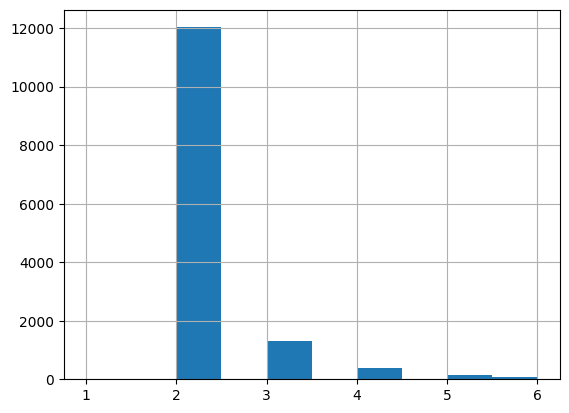

In [ ]:
# Maximum value: 2650000.0
# Minimum value: 72000.0

# Stratified Sampling

housing["sales_cat"] = pd.cut(housing["SALE_PRC"],
                            bins=[0, 72000, 588800, 1105600, 1622400, 2139200, np.inf],
                            labels=[1, 2, 3, 4, 5, 6])

housing["sales_cat"].hist()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["sales_cat"]):
 strat_train_set = housing.loc[train_index]
 strat_test_set = housing.loc[test_index]

# income category proportions the test set
strat_test_set["sales_cat"].value_counts() / len(strat_test_set)

2    0.863294
3    0.094367
4    0.026552
5    0.010047
6    0.005382
1    0.000359
Name: sales_cat, dtype: float64

In [ ]:
def sales_cat_proportions(data):
    return data["sales_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": sales_cat_proportions(housing),
    "Stratified": sales_cat_proportions(strat_test_set),
    "Random": sales_cat_proportions(test_set),
}).sort_index()

compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [ ]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.000287,0.000359,0.000000,-100.000000,24.973089
2,0.863336,0.863294,0.855759,-0.877679,-0.004904
3,0.094387,0.094367,0.103337,9.482128,-0.021529
4,0.026558,0.026552,0.027269,2.680592,-0.021529
5,0.009905,0.010047,0.008253,-16.684607,1.427435
6,0.005527,0.005382,0.005382,-2.618372,-2.618372


In [ ]:
# Drop the 'sales_cat'

for set_ in (strat_train_set, strat_test_set):
 set_.drop("sales_cat", axis=1, inplace=True)

### Discover and Visualize Data

In [ ]:
# make sure you are using the train set and not the test set

housing  = strat_train_set.copy()

<Axes: xlabel='LONGITUDE', ylabel='LATITUDE'>

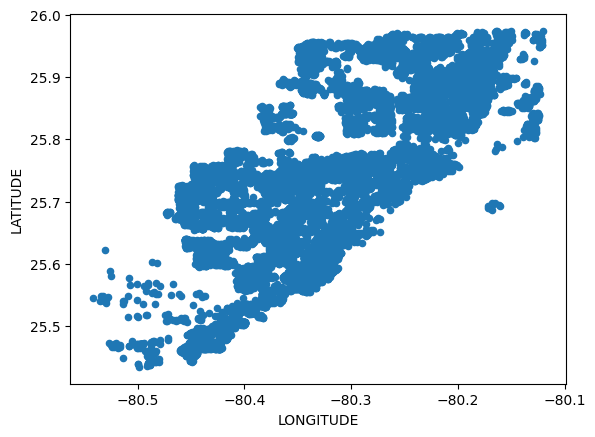

In [ ]:
housing.plot(kind="scatter", x="LONGITUDE", y="LATITUDE")

<Axes: xlabel='LONGITUDE', ylabel='LATITUDE'>

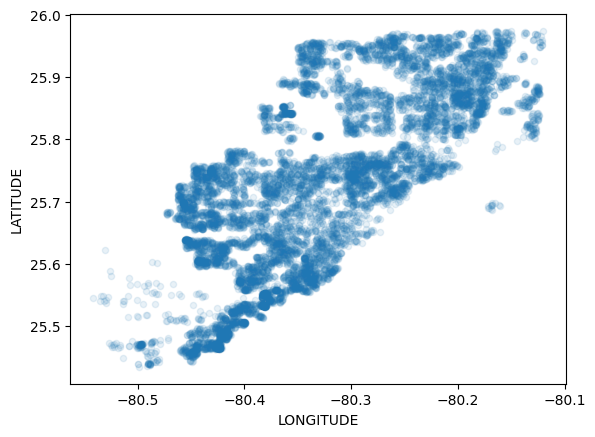

In [ ]:
# Lowering the less densed points

housing.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", alpha = 0.1)

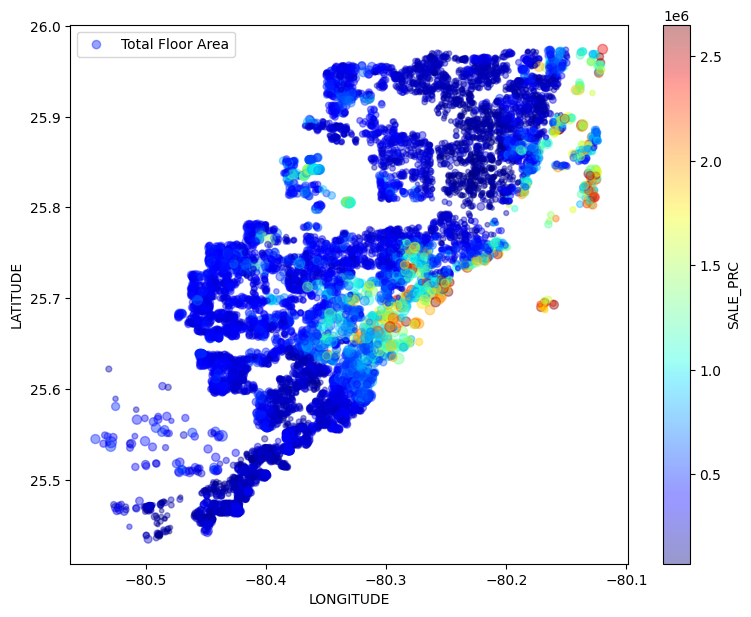

In [ ]:
# Plotting a heat map

housing.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", alpha=0.4,
            s=housing["TOT_LVG_AREA"]/100, label="Total Floor Area", figsize=(9,7),
            c="SALE_PRC", cmap=plt.get_cmap("jet"), colorbar=True,
            )

plt.legend()

### Looking for Correlations


In [ ]:
# standard correlation
# coefficient (also called Pearson’s r)

corr_matrix = housing.corr()

In [ ]:
# Correlation coefficient => range -1 to 1
# and close to 0 means that there isn't a linear correlation
# This only measures linear correlations

corr_matrix['SALE_PRC'].sort_values(ascending=False)

SALE_PRC             1.000000
TOT_LVG_AREA         0.664630
SPEC_FEAT_VAL        0.496752
structure_quality    0.387691
LND_SQFOOT           0.361225
HWY_DIST             0.231516
LONGITUDE            0.195033
LATITUDE             0.051586
month_sold           0.002602
avno60plus          -0.026241
RAIL_DIST           -0.071044
WATER_DIST          -0.122740
age                 -0.126479
PARCELNO            -0.196300
CNTR_DIST           -0.268509
OCEAN_DIST          -0.269589
SUBCNTR_DI          -0.366279
Name: SALE_PRC, dtype: float64

array([[<Axes: xlabel='SALE_PRC', ylabel='SALE_PRC'>,
        <Axes: xlabel='TOT_LVG_AREA', ylabel='SALE_PRC'>,
        <Axes: xlabel='SPEC_FEAT_VAL', ylabel='SALE_PRC'>,
        <Axes: xlabel='structure_quality', ylabel='SALE_PRC'>],
       [<Axes: xlabel='SALE_PRC', ylabel='TOT_LVG_AREA'>,
        <Axes: xlabel='TOT_LVG_AREA', ylabel='TOT_LVG_AREA'>,
        <Axes: xlabel='SPEC_FEAT_VAL', ylabel='TOT_LVG_AREA'>,
        <Axes: xlabel='structure_quality', ylabel='TOT_LVG_AREA'>],
       [<Axes: xlabel='SALE_PRC', ylabel='SPEC_FEAT_VAL'>,
        <Axes: xlabel='TOT_LVG_AREA', ylabel='SPEC_FEAT_VAL'>,
        <Axes: xlabel='SPEC_FEAT_VAL', ylabel='SPEC_FEAT_VAL'>,
        <Axes: xlabel='structure_quality', ylabel='SPEC_FEAT_VAL'>],
       [<Axes: xlabel='SALE_PRC', ylabel='structure_quality'>,
        <Axes: xlabel='TOT_LVG_AREA', ylabel='structure_quality'>,
        <Axes: xlabel='SPEC_FEAT_VAL', ylabel='structure_quality'>,
        <Axes: xlabel='structure_quality', ylabel='structure_

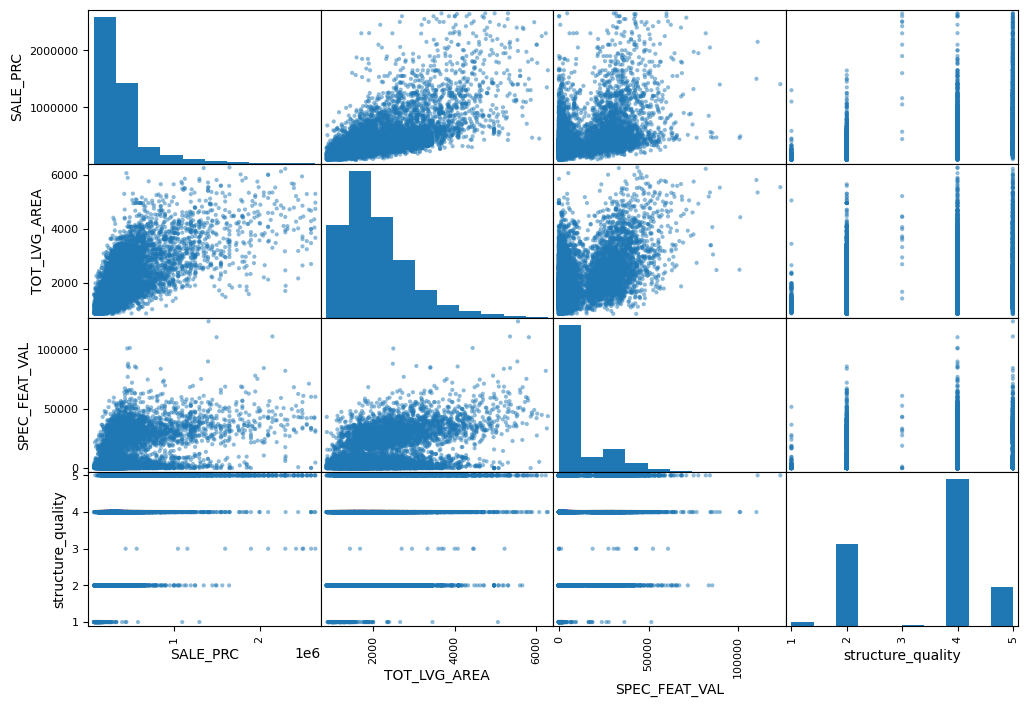

In [ ]:
# scatter_matrix() function, which plots every numerical attribute against every
# other numerical attribute.

from pandas.plotting import scatter_matrix

attributes = ["SALE_PRC", "TOT_LVG_AREA", "SPEC_FEAT_VAL",
                "structure_quality"]

scatter_matrix(housing[attributes], figsize=(12, 8))

<Axes: xlabel='SALE_PRC', ylabel='TOT_LVG_AREA'>

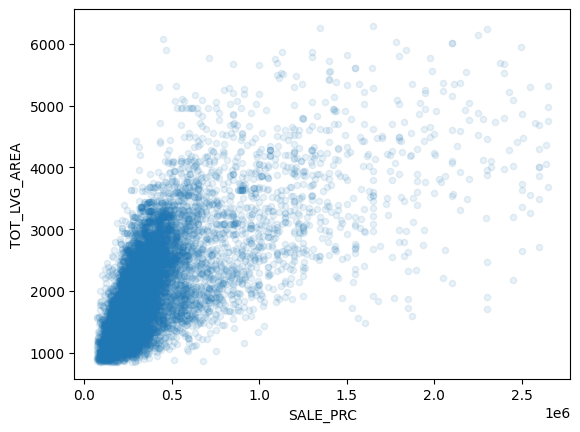

In [ ]:
# The most promissing attribute to predict the SALE_PRC is TOT_LVG_AREA
housing.plot(kind = "scatter", x = 'SALE_PRC', y= "TOT_LVG_AREA", alpha = 0.1)

### Experimenting with Attribute Combinations

In [ ]:
# You also
# noticed that some attributes have a tail-heavy distribution,
# so you may want to transfrom form them (e.g., by computing their logarithm).

housing["price_per_sqft"] = housing["SALE_PRC"] / housing["TOT_LVG_AREA"]
housing["quality_age_interaction"] = housing["structure_quality"] * housing["age"]

In [ ]:
from sklearn.cluster import KMeans

housing["location_feature"] = housing["LATITUDE"] + housing["LONGITUDE"]

# Define the number of clusters you want
num_clusters = 5  # adjust cluster size to fit de data

# Fit a KMeans clustering model to the location feature
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
housing["location_cluster"] = kmeans.fit_predict(housing[["location_feature"]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
corr_matrix = housing.corr()
corr_matrix['SALE_PRC'].sort_values(ascending=False)

SALE_PRC                   1.000000
price_per_sqft             0.778482
TOT_LVG_AREA               0.664630
SPEC_FEAT_VAL              0.496752
structure_quality          0.387691
LND_SQFOOT                 0.361225
location_cluster           0.252339
HWY_DIST                   0.231516
LONGITUDE                  0.195033
location_feature           0.115195
LATITUDE                   0.051586
quality_age_interaction    0.016971
month_sold                 0.002602
avno60plus                -0.026241
RAIL_DIST                 -0.071044
WATER_DIST                -0.122740
age                       -0.126479
PARCELNO                  -0.196300
CNTR_DIST                 -0.268509
OCEAN_DIST                -0.269589
SUBCNTR_DI                -0.366279
Name: SALE_PRC, dtype: float64

### Prepare the Data for the Algorithms

In [ ]:
# Revert to a clean training set (by copying strat_train_set once again)
# Separating the predictors and the labels, since we don't want to apply
# the same transformations to them.

housing = strat_train_set.drop('SALE_PRC', axis=1)
housing_labels = strat_train_set['SALE_PRC'].copy()

### Data Cleaning

In [ ]:
# 1) Get rid of the corresponding districts.
# 2) Get rid of the whole attribute.
# 3) Set the values to some value (zero, the mean, the median, etc.).

# dropna(), drop(), and fillna() methods:

# With this data set there no need to clean the data and replace missing values
# with a variable since all the attributes are completely filled

### Pipelines

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_attribs = list(housing.columns)

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing)

In [ ]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs)
    ])

housing_prepared = full_pipeline.fit_transform(housing)

### Selecting and Training the model

#### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing,housing_labels)

LinearRegression()

In [ ]:
# Trying out new instances ffrom the training set:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions: ", lin_reg.predict(some_data_prepared))
print("Labels: ", list(some_labels))

Predictions:  [1.42602333e+08 1.42132631e+08 1.40857424e+08 1.42802450e+08
 1.40753147e+08]
Labels:  [456000.0, 291000.0, 315000.0, 200000.0, 235000.0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Measuring RMSE on the whole training set:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

# print('Sales Price Mean: ', housing_og['SALE_PRC'].mean())
# Sales Price Mean:  399383.6736653208

170592.83144384608

#### Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [ ]:
# Evaluating on the training set:

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

354.504437407725

#### Better Evaluation Using Cross-Val

In [ ]:
# Spliting the training set into a smaller training set and a validation set
# Then traininng the models against the smaller training set and evaluating them
# against the validation set:

from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared , housing_labels,
                        scoring="neg_mean_squared_error", cv=10)

tree_rmse_scores = np.sqrt(-scores)

In [ ]:
# For tree decision regressor:

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [125228.01138169 133516.23725836 134434.14382482 137951.40818233
 152937.97785268 138311.3648499  122566.04625767 144305.30971827
 140127.4602219  141159.44376666]
Mean: 137053.74033142682
Standard deviation: 8382.741797788667


In [ ]:
# For linear regression model:

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [188559.67632543 179461.20421917 164164.2028078  151367.84285128
 163672.19662708 159657.81854764 158108.41772634 190153.03209429
 176761.54505985 174445.11171676]
Mean: 170635.1047975648
Standard deviation: 12534.71161407886


##### Support Vector Machine


In [ ]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

318210.53322007845

##### Using Random Forest Regressor

In [ ]:
# Emsemble Learning
# training many Decision Trees on random subsets of the features
# then averaging out their predictions.

from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [ ]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [ 92796.94252081  92787.00266276  90157.19638286  82400.42812253
  93547.04673491  97932.19016612  90474.61834309 110342.58717283
  99499.73053476  97793.10019394]
Mean: 94773.08428345932
Standard deviation: 6971.870098137356


### Fine Tunning the Model

#### GridSearch

In [ ]:
# Searching for the best combi‐
# nation of hyperparameter values for the RandomForestRegressor:

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, # train each model 5 times
                            scoring='neg_mean_squared_error',
                            return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

# higher values may result in higher results

{'max_features': 4, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=30, random_state=42)

In [ ]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

# if GridSearch was initialized with refit=True it retrains on the whole set using cross-val)
# feeding more data will likely improve performance

# 97689.76301299654 {'max_features': 4, 'n_estimators': 30}

132663.06197630643 {'max_features': 2, 'n_estimators': 3}
106648.9687574522 {'max_features': 2, 'n_estimators': 10}
100619.15723552063 {'max_features': 2, 'n_estimators': 30}
127301.3441763252 {'max_features': 4, 'n_estimators': 3}
103582.67479797627 {'max_features': 4, 'n_estimators': 10}
97689.76301299654 {'max_features': 4, 'n_estimators': 30}
122588.54185257423 {'max_features': 6, 'n_estimators': 3}
104867.09040949542 {'max_features': 6, 'n_estimators': 10}
98233.59888941984 {'max_features': 6, 'n_estimators': 30}
121476.26203404574 {'max_features': 8, 'n_estimators': 3}
103694.35152187581 {'max_features': 8, 'n_estimators': 10}
98654.25406415538 {'max_features': 8, 'n_estimators': 30}
123060.25604690665 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
103829.94179019895 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
119353.16193291072 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
100336.74595268724 {'bootstrap': False, 'max_features': 3, 'n_esti

#### Randomized Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
        }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a8eca408310>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a8ec9312620>},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
cvres = rnd_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score),params)

# 95115.44379629129 {'max_features': 7, 'n_estimators': 180}

95474.96900201327 {'max_features': 7, 'n_estimators': 180}
101742.14435491979 {'max_features': 5, 'n_estimators': 15}
96640.02186297381 {'max_features': 3, 'n_estimators': 72}
100520.01733886955 {'max_features': 5, 'n_estimators': 21}
95836.60686481278 {'max_features': 7, 'n_estimators': 122}
96575.13610969776 {'max_features': 3, 'n_estimators': 75}
96135.06902188271 {'max_features': 3, 'n_estimators': 88}
95631.4438123073 {'max_features': 5, 'n_estimators': 100}
95811.18759906015 {'max_features': 3, 'n_estimators': 150}
131380.8746752253 {'max_features': 5, 'n_estimators': 2}


### Analyze the Best Models and Their Error

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([3.55040771e-02, 6.44320470e-02, 4.89236413e-02, 5.51631772e-02,
       2.32612494e-01, 9.43943906e-02, 2.59712571e-02, 1.15845100e-01,
       3.72508415e-02, 4.29668365e-02, 8.50914703e-02, 2.44294686e-02,
       3.03448904e-02, 2.00684610e-04, 5.53722059e-03, 1.01332403e-01])

In [ ]:
extra_attribs = ["price_per_sqft","quality_age_interaction","location_cluster"]
attributes = list(housing) + extra_attribs
sorted(zip(feature_importances, attributes), reverse = True)

# I will drop some of the less important attributes after testing the model

[(0.23261249378606874, 'TOT_LVG_AREA'),
 (0.11584510048127539, 'OCEAN_DIST'),
 (0.10133240293033119, 'structure_quality'),
 (0.09439439056871121, 'SPEC_FEAT_VAL'),
 (0.08509147031027516, 'SUBCNTR_DI'),
 (0.06443204700443413, 'LONGITUDE'),
 (0.05516317723457209, 'LND_SQFOOT'),
 (0.04892364128173964, 'PARCELNO'),
 (0.04296683650126594, 'CNTR_DIST'),
 (0.037250841529973336, 'WATER_DIST'),
 (0.035504077096482546, 'LATITUDE'),
 (0.030344890430776702, 'age'),
 (0.025971257078006155, 'RAIL_DIST'),
 (0.024429468570958752, 'HWY_DIST'),
 (0.005537220585272863, 'month_sold'),
 (0.00020068460985625674, 'avno60plus')]

### Evaluating on the Test Set

In [ ]:
# to transform the data (call transform(), notfit_transform()—you do not want to
# fit the test set!)

final_model = grid_search.best_estimator_ # selecting the best estimator

X_test = strat_test_set.drop("SALE_PRC", axis=1) # contains the features variables(independent)
y_test = strat_test_set["SALE_PRC"].copy() # the variable you want to predict (target value)
X_test_prepared = full_pipeline.transform(X_test) # applying the same preprocessing steps to the test dataset

final_predictions = final_model.predict(X_test_prepared) # uses the 'final_model' estimator to make predictions on the preprocessed test dataset
final_mse = mean_squared_error(y_test, final_predictions) # calculate MSE between the actual target values and the predicted values
final_rmse = np.sqrt(final_mse) #RMSE

print(final_rmse)

96581.48553319443


In [ ]:
Max_Sales_Price = 2650000
Min_Sales_Price = 72000

percentage_of_RMSE = (final_rmse / (Max_Sales_Price - Min_Sales_Price)) * 100
print(percentage_of_RMSE)

3.746372596322515


In [ ]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
        loc=squared_errors.mean(),
        scale=stats.sem(squared_errors)))

array([ 86004.4993706 , 106109.34352643])

### Prediction


In [ ]:
def predict_sale_price(user_land_area, total_lvg_area,user_latitude,user_longitude,user_spec_feat_value,
                       user_rail_distance,user_ocean_distance,user_water_distance,user_center_distance,
                       user_subcenter_distance,user_highway_distance,user_structure_age,user_sale_month, model, pipeline):

    user_parcel_no = '123456789'
    user_sale_price = 0
    user_airplane_noise_dummy = 1  # 1 for true, 0 for false
    user_structure_quality = 10


    input_data = {
        'LATITUDE': user_latitude,
        'LONGITUDE': user_longitude,
        'PARCELNO': user_parcel_no,
        'SALE_PRC': user_sale_price,
        'LND_SQFOOT': user_land_area,
        'TOT_LVG_AREA': total_lvg_area,
        'SPEC_FEAT_VAL': user_spec_feat_value,
        'RAIL_DIST': user_rail_distance,
        'OCEAN_DIST': user_ocean_distance,
        'WATER_DIST': user_water_distance,
        'CNTR_DIST': user_center_distance,
        'SUBCNTR_DI': user_subcenter_distance,
        'HWY_DIST': user_highway_distance,
        'age': user_structure_age,
        'avno60plus': user_airplane_noise_dummy,
        'structure_quality': user_structure_quality,
        'month_sold': user_sale_month,
    }

    # Create a DataFrame from the input data
    input_df = pd.DataFrame(input_data, index=[0])

    # Apply the preprocessing pipeline
    input_prepared = pipeline.transform(input_df)

    # Make the prediction
    predicted_price = model.predict(input_prepared)

    return predicted_price[0]  # Assuming a single prediction is returned


In [ ]:
# Ask the user for input

user_land_area = float(input("Enter the land area (square feet): "))
total_lvg_area = int(input("Enter the total livable area: "))
user_latitude = float(input("Enter the latitude: "))
user_longitude = float(input("Enter the longitude: "))
user_spec_feat_value = float(input("Enter the value of special features (DOLLARS): "))
user_rail_distance = float(input("Enter the distance to the nearest rail line (feet): "))
user_ocean_distance = float(input("Enter the distance to the ocean (feet): "))
user_water_distance = float(input("Enter the distance to the nearest body of water (feet): "))
user_center_distance = float(input("Enter the distance to the central business district (feet): "))
user_subcenter_distance = float(input("Enter the distance to the nearest subcenter (feet): "))
user_highway_distance = float(input("Enter the distance to the nearest highway (feet): "))
user_structure_age = int(input("Enter the age of the structure: "))
user_sale_month = int(input("Enter the sale month in 2016 (1 = Jan, 2 = Feb, etc.): "))

# Use the function to predict sale price
predicted_price = predict_sale_price(user_land_area, total_lvg_area,user_latitude,user_longitude,user_spec_feat_value,
                                    user_rail_distance,user_ocean_distance,user_water_distance,user_center_distance,
                                    user_subcenter_distance,user_highway_distance,user_structure_age,user_sale_month, final_model, full_pipeline)

# Display the predicted sale price
print(f"Predicted Sale Price: ${predicted_price:.2f}")

#$1336923.33

Enter the land area (square feet): 3000
Enter the total livable area: 1500
Enter the latitude: 25.2
Enter the longitude: -80.1
Enter the value of special features (DOLLARS): 10000
Enter the distance to the nearest rail line (feet): 50
Enter the distance to the ocean (feet): 200
Enter the distance to the nearest body of water (feet): 200
Enter the distance to the central business district (feet): 100
Enter the distance to the nearest subcenter (feet): 80
Enter the distance to the nearest highway (feet): 10
Enter the age of the structure: 20
Enter the sale month in 2016 (1 = Jan, 2 = Feb, etc.): 4
Predicted Sale Price: $997143.33
